In [3]:
import pandas as pd
import numpy as np

In [4]:
data_df=pd.read_excel('Folds5x2_pp.xlsx')

In [5]:
data_df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [6]:
x=data_df.drop('PE',axis=1).values

In [7]:
x

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  31.32,   74.33, 1012.92,   36.48],
       [  24.48,   69.45, 1013.86,   62.39],
       [  21.6 ,   62.52, 1017.23,   67.87]])

In [8]:
y=data_df['PE'].values
y

array([463.26, 444.37, 488.56, ..., 429.57, 435.74, 453.28])

In [9]:
 from sklearn.model_selection import train_test_split

In [10]:
 X_train, X_test, y_train, y_test = train_test_split(
...     x, y, test_size=0.3, random_state=0)

In [11]:
X_train

array([[  15.83,   41.67, 1013.39,   74.12],
       [  22.56,   62.26, 1012.11,   63.16],
       [  22.11,   59.8 , 1016.86,   70.14],
       ...,
       [  16.81,   38.52, 1018.26,   75.21],
       [  12.8 ,   41.16, 1022.43,   86.19],
       [  32.32,   67.9 , 1006.08,   37.93]])

In [12]:
y_train

array([464.93, 445.33, 450.62, ..., 459.01, 462.72, 428.12])

In [13]:
X_test

array([[  28.66,   77.95, 1009.56,   69.07],
       [  17.48,   49.39, 1021.51,   84.53],
       [  14.86,   43.14, 1019.21,   99.14],
       ...,
       [  31.63,   68.3 , 1014.8 ,   42.02],
       [  25.12,   77.95, 1009.26,   82.95],
       [  26.3 ,   59.07, 1007.84,   78.32]])

In [14]:
y_test

array([431.23, 460.01, 461.14, ..., 426.86, 433.4 , 441.94])

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
reg = LinearRegression().fit(X_train, y_train)

In [17]:
y_pred=reg.predict(X_test)

In [18]:
print(y_pred)

[431.40245096 458.61474119 462.81967423 ... 432.47380825 436.16417243
 439.00714594]


In [19]:
reg.predict([[8.34,40.77,1010.84,90.01]])  #it predicts energy output for given inputs in specified order.

array([477.05525359])

In [20]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)   #It is predicting 93 percent correctly,that implies a high accuracy.

0.9304112159477682

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt


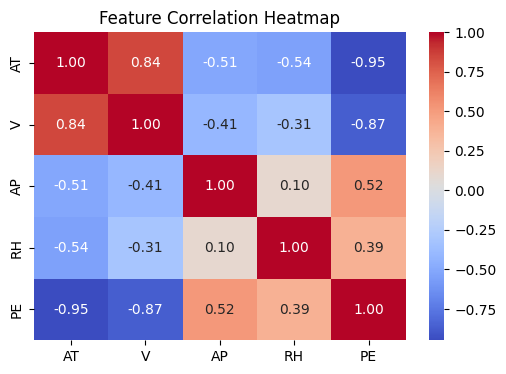

In [22]:
# --- Heatmap (Correlation Matrix) ---
plt.figure(figsize=(6, 4))
sns.heatmap(data_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


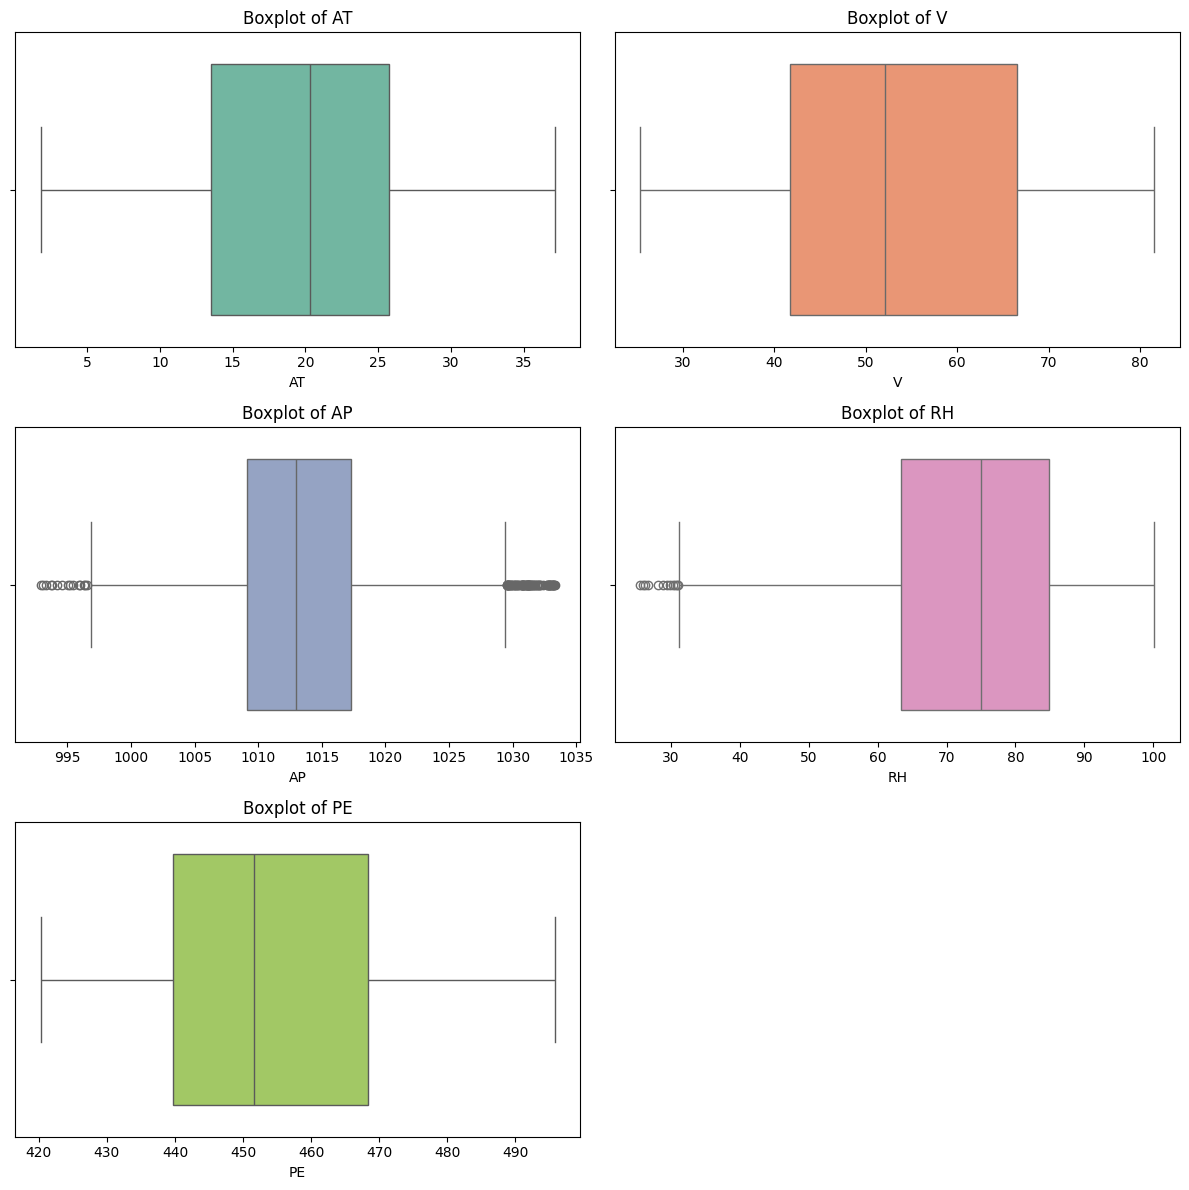

In [23]:
#To find outliers of each feature

numerical_features = data_df.select_dtypes(include=['number']).columns  # Extract numerical columns (excluding categorical if any)


num_features = len(numerical_features)
cols = 2  # Two boxplots per row
rows = (num_features // cols) + (num_features % cols > 0)  # Adjust rows dynamically


fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each feature separately
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=data_df[feature], ax=axes[i], color=sns.color_palette("Set2")[i % len(sns.color_palette("Set2"))])
    axes[i].set_title(f"Boxplot of {feature}", fontsize=12)
    axes[i].set_xlabel(feature, fontsize=10)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


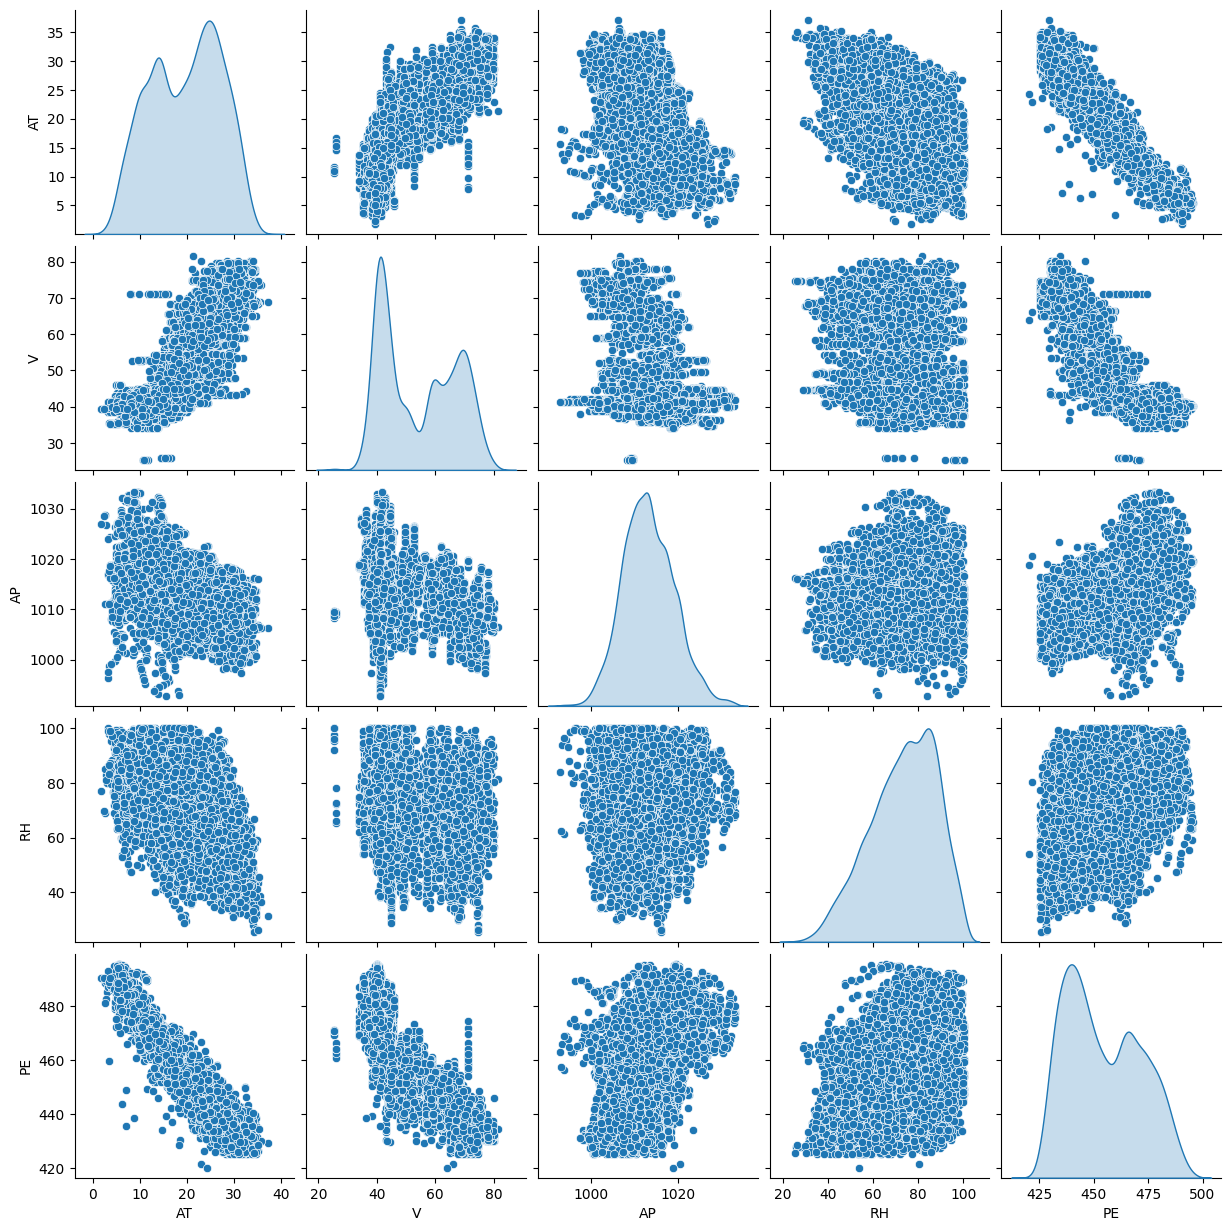

In [24]:
sns.pairplot(data_df, diag_kind="kde")
plt.show()

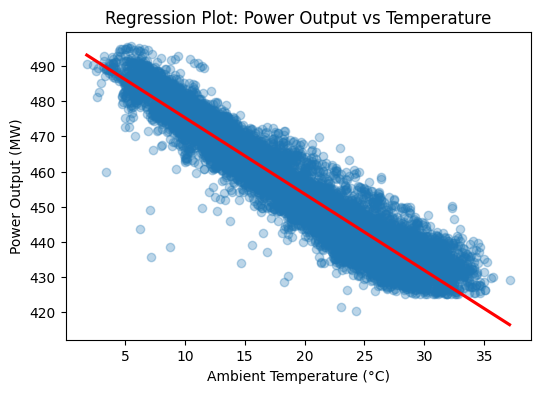

In [25]:
plt.figure(figsize=(6, 4))
sns.regplot(x=data_df['AT'], y=data_df['PE'], scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("Power Output (MW)")
plt.title("Regression Plot: Power Output vs Temperature")
plt.show()

<ipython-input-26-2d1d40005de3>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_df['PE'], shade=True, color="green")


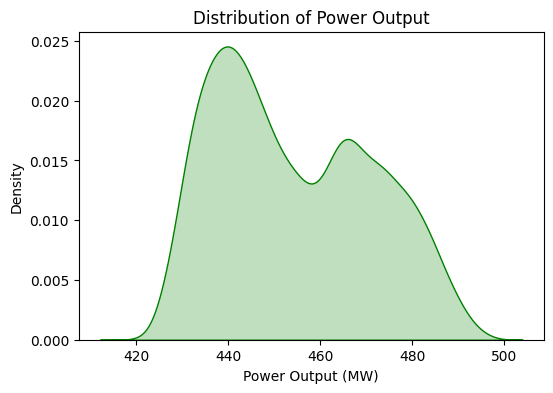

In [26]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data_df['PE'], shade=True, color="green")
plt.title("Distribution of Power Output")
plt.xlabel("Power Output (MW)")
plt.show()

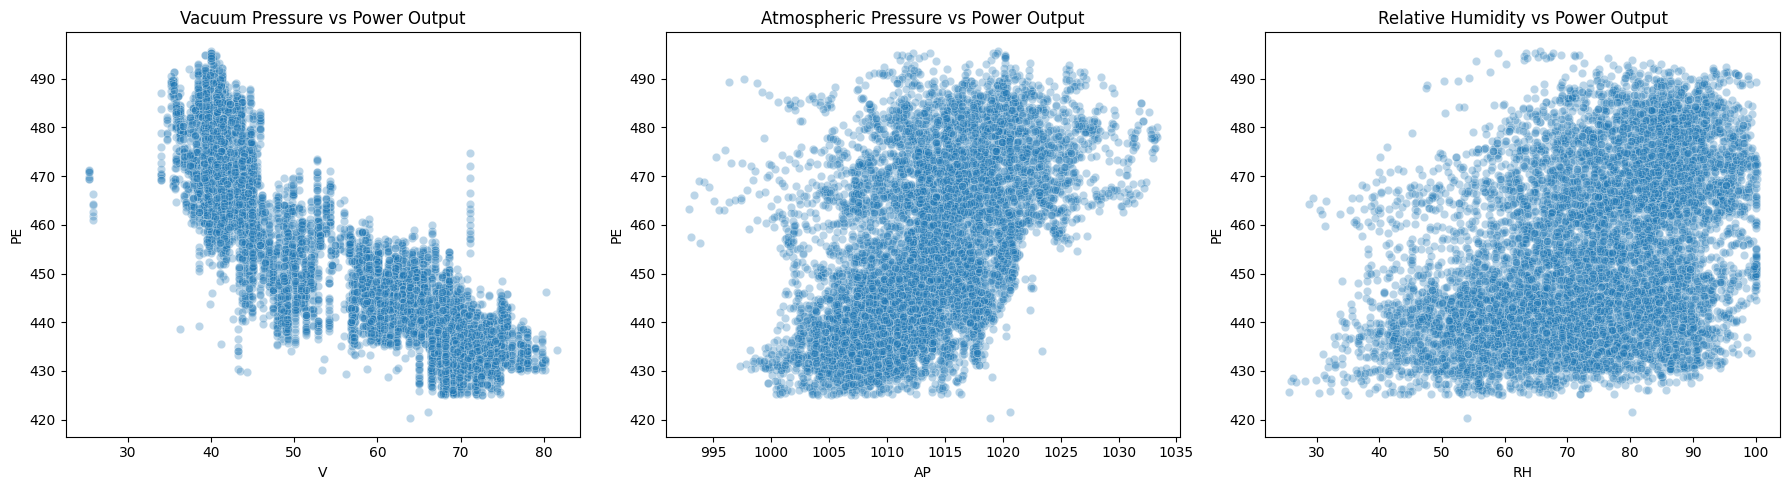

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(x=data_df['V'], y=data_df['PE'], alpha=0.3, ax=axes[0])
axes[0].set_title("Vacuum Pressure vs Power Output")

sns.scatterplot(x=data_df['AP'], y=data_df['PE'], alpha=0.3, ax=axes[1])
axes[1].set_title("Atmospheric Pressure vs Power Output")

sns.scatterplot(x=data_df['RH'], y=data_df['PE'], alpha=0.3, ax=axes[2])
axes[2].set_title("Relative Humidity vs Power Output")

plt.tight_layout()
plt.show()


In [30]:
#Feature Engineering Goal:Capture non linear relationship with variables.
import pandas as pd

# Load your dataset (replace with your file path)
data = pd.read_excel("/content/Folds5x2_pp.xlsx")

# Create interaction term: Temperature × Vacuum
data['AT_V'] = data['AT'] * data['V']

# Create polynomial terms (e.g., AT²)
data['AT_squared'] = data['AT'] ** 2

print("New features added:", data[['AT_V', 'AT_squared']].head())

New features added:         AT_V  AT_squared
0   624.7296    223.8016
1  1585.3328    634.0324
2   201.3340     26.1121
3  1195.6952    435.1396
4   405.7500    117.0724


In [31]:
#Model Training(XGBoost)
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Define features and target
X = data[['AT', 'V', 'AP', 'RH', 'AT_V', 'AT_squared']]
y = data['PE']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', max_depth=5, learning_rate=0.1)
model.fit(X_train, y_train)

print("Model trained! Ready for validation.")

Model trained! Ready for validation.


In [32]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on test data
y_pred = model.predict(X_test)

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f} MW")
print(f"R²: {r2:.2f} (Variance Explained)")

RMSE: 3.44 MW
R²: 0.96 (Variance Explained)


In [33]:
#Using XGBoost, the model explains 96 percent of variance in PE,with RMSE=3.44 W

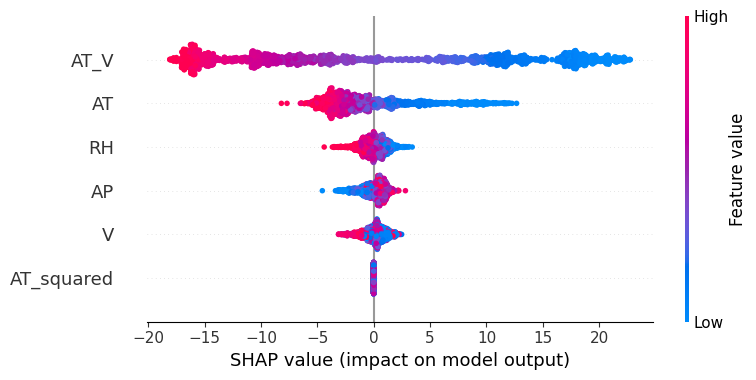

In [34]:
import shap

# Calculate SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot feature importance
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [35]:
# Temperature Control-Calculate PE loss when AT > 25°C
high_temp_mask = data['AT'] > 25
avg_pe_loss = data.loc[~high_temp_mask, 'PE'].mean() - data.loc[high_temp_mask, 'PE'].mean()

print(f"PE drops by {avg_pe_loss:.1f} MW when temperature exceeds 25°C.")

PE drops by 25.3 MW when temperature exceeds 25°C.


In [36]:
#Vacuum Pressure Optimization
optimal_v = data[(data['V'] >= 40) & (data['V'] <= 60)]
pe_gain = optimal_v['PE'].mean() - data['PE'].mean()

print(f"Optimal V range (40-60 hPa) boosts PE by {pe_gain:.1f} MW.")

Optimal V range (40-60 hPa) boosts PE by 7.4 MW.


In [37]:
#Estimating Annual Energy Output
# Net hourly data for PE
total_energy_mwh = data['PE'].sum()
total_hours = len(data)
avg_pe = total_energy_mwh / total_hours
annual_energy_mwh = avg_pe * 8760

print(f"Total Energy in Dataset: {total_energy_mwh:,.0f} MWh")
print(f"Average Power Output: {avg_pe:.2f} MW")
print(f"Estimated Annual Energy Output: {annual_energy_mwh:,.0f} MWh")

Total Energy in Dataset: 4,347,364 MWh
Average Power Output: 454.37 MW
Estimated Annual Energy Output: 3,980,237 MWh


In [38]:
#Estimating Fuel Efficiency
annual_energy_output_mwh = 3_980_237  # From your data
fuel_consumption_rate = 7.5  # MMBtu/MWh = Million BTU to MegaWatt Hours
fuel_price_per_mmbtu = 350  # ₹/MMBtu

annual_fuel_cost = annual_energy_output_mwh * fuel_consumption_rate * fuel_price_per_mmbtu
print(f"Annual Fuel Cost: ₹{annual_fuel_cost:,.2f}")

Annual Fuel Cost: ₹10,448,122,125.00


In [40]:
annual_fuel_cost = 10448122125.00
pe_std_reduction = data['PE'].std() - y_pred.std()
savings = annual_fuel_cost * (pe_std_reduction / data['PE'].std())

print(f"Estimated annual savings: ${savings/1e6:.2f}M")

Estimated annual savings: $244.65M
